<a href="https://colab.research.google.com/github/TejasweeSahu/Deepfake-image-detector/blob/main/Bishop_Boys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip DATASET.zip
%ls


Archive:  DATASET.zip
   creating: DATASET/
   creating: DATASET/real_cifake_images/
  inflating: DATASET/real_cifake_images/1.png  
  inflating: DATASET/real_cifake_images/2.png  
  inflating: DATASET/real_cifake_images/3.png  
  inflating: DATASET/real_cifake_images/4.png  
  inflating: DATASET/real_cifake_images/5.png  
  inflating: DATASET/real_cifake_images/6.png  
  inflating: DATASET/real_cifake_images/7.png  
  inflating: DATASET/real_cifake_images/8.png  
  inflating: DATASET/real_cifake_images/9.png  
  inflating: DATASET/real_cifake_images/10.png  
  inflating: DATASET/real_cifake_images/11.png  
  inflating: DATASET/real_cifake_images/12.png  
  inflating: DATASET/real_cifake_images/13.png  
  inflating: DATASET/real_cifake_images/14.png  
  inflating: DATASET/real_cifake_images/15.png  
  inflating: DATASET/real_cifake_images/16.png  
  inflating: DATASET/real_cifake_images/17.png  
  inflating: DATASET/real_cifake_images/18.png  
  inflating: DATASET/real_cifake_images/19

In [ ]:
import os
import json

# Specify the base directory for the extracted dataset
base_path = "/content/DATASET"  # Colab default directory for uploaded files

# Check the structure of the uploaded dataset
print(os.listdir(base_path))

# Verify subfolders and JSON files
fake_images_path = os.path.join(base_path, 'fake_cifake_images')
real_images_path = os.path.join(base_path, 'real_cifake_images')
test_images_path = os.path.join(base_path, 'test')

fake_preds_file = os.path.join(base_path, 'fake_cifake_preds.json')
real_preds_file = os.path.join(base_path, 'real_cifake_preds.json')

print("Fake images folder:", os.listdir(fake_images_path)[:5])
print("Real images folder:", os.listdir(real_images_path)[:5])
print("Test images folder:", os.listdir(test_images_path)[:5])


['test', 'fake_cifake_preds.json', 'fake_cifake_images', 'real_cifake_images', 'real_cifake_preds.json']
Fake images folder: ['231.png', '228.png', '179.png', '433.png', '971.png']
Real images folder: ['231.png', '228.png', '179.png', '433.png', '971.png']
Test images folder: ['231.png', '228.png', '179.png', '433.png', '214.png']


In [ ]:
# Load fake and real predictions JSON
with open(fake_preds_file, 'r') as f:
    fake_preds = json.load(f)

with open(real_preds_file, 'r') as f:
    real_preds = json.load(f)

# Check the type and structure of the data
print("Type of fake_preds:", type(fake_preds))
print("Sample from fake_preds:", fake_preds[:3])  # Show the first 3 entries if it's a list


Type of fake_preds: <class 'list'>
Sample from fake_preds: [{'index': 1, 'prediction': 'fake'}, {'index': 2, 'prediction': 'fake'}, {'index': 3, 'prediction': 'fake'}]


In [ ]:
# Convert list to dictionary using 'index' as the key and 'prediction' as the value
fake_preds_dict = {entry['index']: entry['prediction'] for entry in fake_preds}
real_preds_dict = {entry['index']: entry['prediction'] for entry in real_preds}

# Verify the dictionaries
print("Sample fake_preds_dict:", list(fake_preds_dict.items())[:5])
print("Sample real_preds_dict:", list(real_preds_dict.items())[:5])


Sample fake_preds_dict: [(1, 'fake'), (2, 'fake'), (3, 'fake'), (4, 'fake'), (5, 'fake')]
Sample real_preds_dict: [(1, 'real'), (2, 'fake'), (3, 'real'), (4, 'real'), (5, 'real')]


In [ ]:
import cv2

def preprocess_image(image_path):
    """
    Load an image from the given path, resize it to 224x224, and normalize pixel values.
    """
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))  # Resize to 224x224
    image = image / 255.0  # Normalize pixel values to [0, 1]
    return image


In [ ]:
import numpy as np
import os

# Combine fake and real images with labels
images = []
labels = []

# Preprocess fake images
for img_name in os.listdir(fake_images_path):
    # Extract index from the filename (e.g., '1.jpg' -> 1)
    img_index = int(img_name.split('.')[0])
    if img_index in fake_preds_dict:
        img_path = os.path.join(fake_images_path, img_name)
        images.append(preprocess_image(img_path))
        labels.append(1 if fake_preds_dict[img_index] == 'fake' else 0)  # 'fake' -> 1, 'real' -> 0

# Preprocess real images
for img_name in os.listdir(real_images_path):
    img_index = int(img_name.split('.')[0])
    if img_index in real_preds_dict:
        img_path = os.path.join(real_images_path, img_name)
        images.append(preprocess_image(img_path))
        labels.append(1 if real_preds_dict[img_index] == 'fake' else 0)  # 'fake' -> 1, 'real' -> 0

# Convert lists to numpy arrays for model training
images = np.array(images)
labels = np.array(labels)

print("Number of images loaded:", len(images))
print("Number of labels loaded:", len(labels))


Number of images loaded: 2000
Number of labels loaded: 2000


Shape of images array: (2000, 224, 224, 3)
Shape of labels array: (2000,)


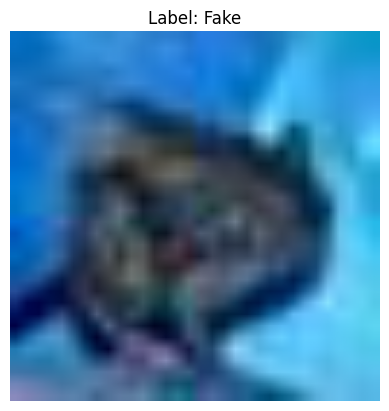

In [ ]:
print(f"Shape of images array: {images.shape}")  # Should be (num_samples, 224, 224, 3)
print(f"Shape of labels array: {labels.shape}")  # Should be (num_samples,)

# Display a sample image and label
import matplotlib.pyplot as plt

plt.imshow(images[0])
plt.title(f"Label: {'Fake' if labels[0] == 1 else 'Real'}")
plt.axis('off')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

print("Training set size:", len(X_train))
print("Validation set size:", len(X_val))


Training set size: 1600
Validation set size: 400


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout

# Simple CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification: Fake/Real
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 159s 3s/step - accuracy: 0.5414 - loss: 2.9774 - val_accuracy: 0.5850 - val_loss: 0.6900
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 155s 3s/step - accuracy: 0.6162 - loss: 0.6434 - val_accuracy: 0.5825 - val_loss: 0.6800
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 204s 3s/step - accuracy: 0.6634 - loss: 0.5944 - val_accuracy: 0.5975 - val_loss: 0.6714
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 201s 3s/step - accuracy: 0.7474 - loss: 0.5234 - val_accuracy: 0.7075 - val_loss: 0.6255
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 202s 3s/step - accuracy: 0.7622 - loss: 0.4856 - val_accuracy: 0.7225 - val_loss: 0.5798
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 202s 3s/step - accuracy: 0.7952 - loss: 0.4176 - val_accuracy: 0.7025 - val_loss: 0.5864
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 198s 3s/step - accuracy: 0.8380 - loss: 0.3663 - val_accuracy: 0.6975 - val_loss: 0.6019
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 206s 3s/step - accuracy: 0.8457 - loss: 0.3534 - val_accuracy: 0.7050 - v

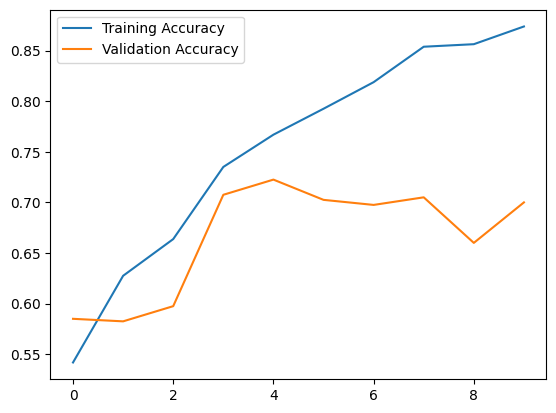

In [ ]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

# Visualize training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


In [ ]:
# Preprocess test images
test_images = [preprocess_image(os.path.join(test_images_path, img)) for img in os.listdir(test_images_path)]
test_images = np.array(test_images)


In [ ]:
# Predict on test images
predictions = model.predict(test_images)
predicted_labels = (predictions > 0.5).astype(int)  # Convert probabilities to binary labels

# Map binary labels to 'fake' and 'real'
label_mapping = {0: "real", 1: "fake"}
predicted_labels_mapped = [label_mapping[label[0]] for label in predicted_labels]

# Prepare the output JSON as a list of dictionaries
test_image_names = os.listdir(test_images_path)
output_json = []

for index, prediction in enumerate(predicted_labels_mapped, start=1):
    output_json.append({
        "index": index,  # Assuming the index is sequential
        "prediction": prediction
    })

# Save to JSON file
output_file = 'BishopBoys_prediction.json'
with open(output_file, 'w') as f:
    json.dump(output_json, f, indent=4)  # Use indent=4 for pretty formatting

# Download the JSON file
from google.colab import files
files.download(output_file)


16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 753ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>